In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

#lire l'image et transformer la matrice en un array
image = cv2.imread('fig3.png', 0)
img_np = np.array(image)
flat_array = img_np.flatten()
print(flat_array)

# enregistrer array dans un fichier
with open('compressed_image.txt', 'w') as file:
    for value in flat_array:
        file.write(str(value) + ' ')

# calculer le taux de la compression
original_size = img_np.size * img_np.itemsize
compressed_size = os.path.getsize('compressed_image.txt')
compression_rate = original_size / compressed_size

print(f'Original size: {original_size} bytes')
print(f'Compressed size: {compressed_size} bytes')
print(f'Compression rate: {compression_rate:.2f}x')

from PIL import Image

def get_image_dimensions(image_path):
    try:
        # Ouvrir l'image avec PIL
        with Image.open(image_path) as img:
            # Obtenir les dimensions de l'image
            width, height = img.size
            return width, height
    except Exception as e:
        print(f"Erreur : {e}")
        return None

# Spécifiez le chemin de l'image compressée
compressed_image_path = 'fig3.png'  # Remplacez par le chemin de votre image compressée

# Obtenez les dimensions de l'image
dimensions = get_image_dimensions(compressed_image_path)

if dimensions:
    print(f"Largeur de l'image : {dimensions[0]} pixels")
    print(f"Hauteur de l'image : {dimensions[1]} pixels")




[255 255 255 ... 255 255 255]
Original size: 218280 bytes
Compressed size: 688568 bytes
Compression rate: 0.32x
Largeur de l'image : 510 pixels
Hauteur de l'image : 428 pixels


In [33]:
# fonction de l'algorithme RLE
def rle_encode_to_hex(flat_array):
    encoded_data = []
    current_value = flat_array[0]
    count = 1

    for i in range(1, len(flat_array)):
        if flat_array[i] == current_value:
            count += 1
        else:
            encoded_data.append((current_value, count))
            current_value = flat_array[i]
            count = 1

    encoded_data.append((current_value, count)) 

    # Convertir en hexadecimal
    hex_encoded_data = []
    for value, count in encoded_data:
        hex_value = hex(value)[2:]  
        hex_count = hex(count)[2:] 

        # assurer que les valeurs hex sont en 2 octects
        if len(hex_value) < 2:
            hex_value = '0' + hex_value
        if len(hex_count) < 2:
            hex_count = '0' + hex_count

        hex_encoded_data.append(hex_value + hex_count)

    return hex_encoded_data


hex_encoded_data = rle_encode_to_hex(flat_array)
for hex_code in hex_encoded_data:
    print(f"Hex Code: {hex_code}")



Hex Code: ff152
Hex Code: fd05
Hex Code: fc08
Hex Code: fd03
Hex Code: fc03
Hex Code: fb07
Hex Code: fc01
Hex Code: fe06
Hex Code: ff1fe
Hex Code: fe01
Hex Code: ff1fd
Hex Code: fe01
Hex Code: ff1fd
Hex Code: fe01
Hex Code: ff1fd
Hex Code: fe01
Hex Code: ff1fd
Hex Code: fd01
Hex Code: fe03
Hex Code: ff1fa
Hex Code: fc01
Hex Code: fe03
Hex Code: ff1fa
Hex Code: fb01
Hex Code: fe01
Hex Code: ffbd1
Hex Code: 0016
Hex Code: ff1e8
Hex Code: 0016
Hex Code: ff1e8
Hex Code: 0016
Hex Code: ff1e8
Hex Code: 0016
Hex Code: ff1e8
Hex Code: 0016
Hex Code: ff1e8
Hex Code: 0016
Hex Code: ff1e8
Hex Code: 0016
Hex Code: ff1e8
Hex Code: 0016
Hex Code: ff1e8
Hex Code: 0016
Hex Code: ff1e8
Hex Code: 0016
Hex Code: ff1e8
Hex Code: 0016
Hex Code: ff1e8
Hex Code: 0016
Hex Code: ff1e8
Hex Code: 002a
Hex Code: ff1d4
Hex Code: 002a
Hex Code: ff1d4
Hex Code: 002a
Hex Code: ff1d4
Hex Code: 002a
Hex Code: ff1b9
Hex Code: 0045
Hex Code: ff1b9
Hex Code: 0045
Hex Code: ff1b9
Hex Code: 0045
Hex Code: ff1b9
Hex Code: 00

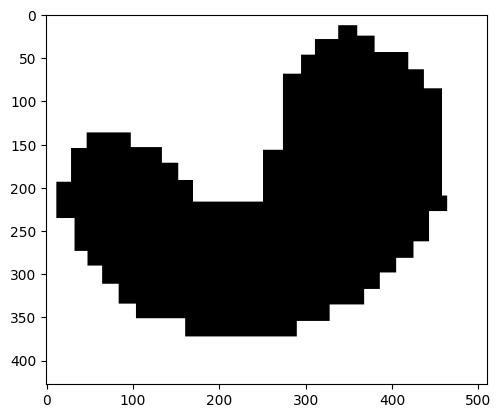

In [34]:
def rle_decode_from_hex(hex_encoded_data):
    # Décode les données hexadécimales en paires (valeur, compteur)
    encoded_data = []
    for hex_code in hex_encoded_data:
        hex_value = hex_code[:2]  # Extrait les deux premiers caractères comme la valeur hexadécimale
        hex_count = hex_code[2:]  # Extrait les caractères restants comme le compteur hexadécimal

        # Convertit la valeur hexadécimale et le compteur hexadécimal en entiers
        value = int(hex_value, 16)
        count = int(hex_count, 16)

        encoded_data.append((value, count))

    # Décompresse les données RLE pour obtenir les données de l'image
    decompressed_data = []
    for value, count in encoded_data:
        decompressed_data.extend([value] * count)

    return decompressed_data

# Convertit les données décompressées en une image en utilisant les dimensions de l'image d'origine
def create_image_from_data(decompressed_data, width, height):
    image_np = np.array(decompressed_data).reshape((height, width)).astype(np.uint8)
    return image_np

# Exemple d'utilisation
decompressed_data = rle_decode_from_hex(hex_encoded_data)

# Spécifiez la largeur et la hauteur de l'image d'origine
image_width = 510
image_height = 428

# Recréez l'image à partir des données décompressées
image = create_image_from_data(decompressed_data, image_width, image_height)
plt.imshow(image,cmap='gray')
plt.show() 



